<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
import pandas as pd

# Read the dataset into a pandas DataFrame
file_path = "/Users/berkecemoktem/Downloads/winequality-red.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. About the Data


The dataset contains various physicochemical attributes of red wines along with quality ratings provided by experts. Each row represents a unique wine sample, and each column represents a different attribute related to the wine's characteristics. The dataset includes the following attributes:

Fixed Acidity: The fixed acidity of the wine.
Volatile Acidity: The volatile acidity of the wine.
Citric Acid: The citric acid content in the wine.
Residual Sugar: The residual sugar content in the wine.
Chlorides: The chloride content in the wine.
Free Sulfur Dioxide: The concentration of free sulfur dioxide in the wine.
Total Sulfur Dioxide: The total concentration of sulfur dioxide in the wine.
Density: The density of the wine.
pH: The pH value of the wine.
Sulphates: The sulphate content in the wine.
Alcohol: The alcohol content in the wine.
Quality: The quality rating of the wine, ranging from 0 to 10.

Data Exploration:

<Axes: >

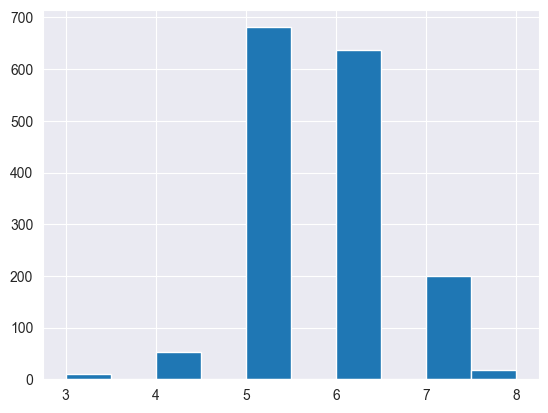

In [5]:
# Making a histogram of the quality variable.
data['quality'].hist()


Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

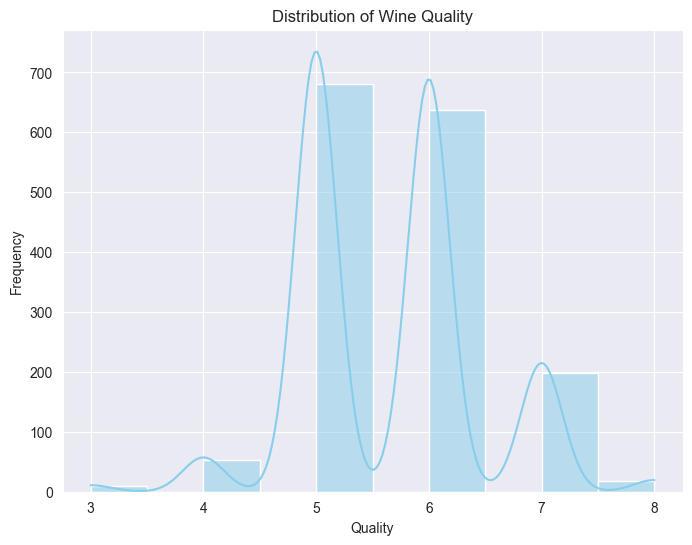

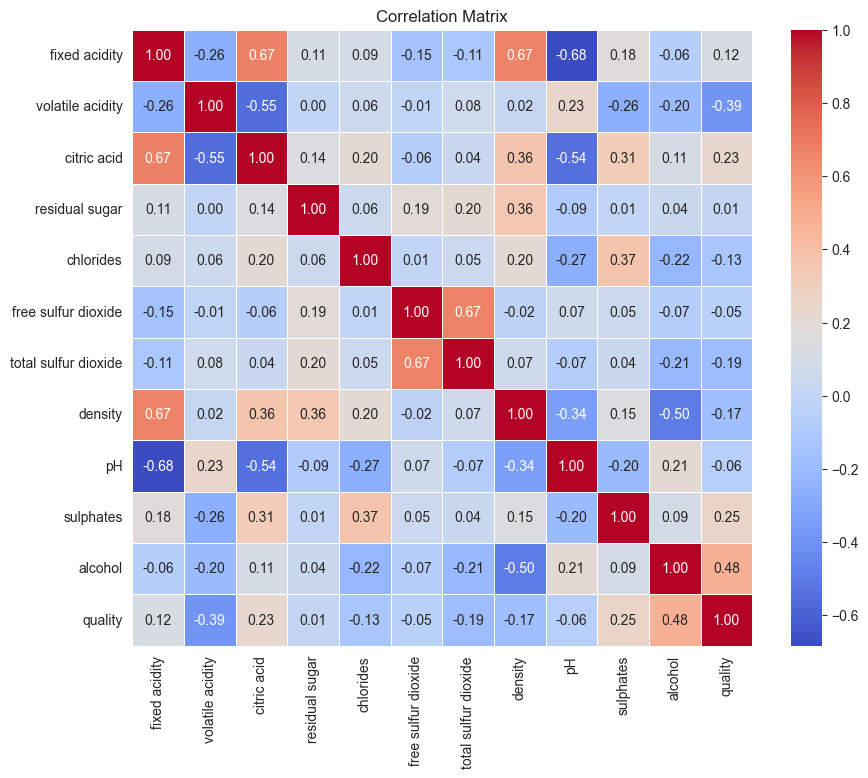

In [6]:
# Display summary statistics of the numerical features
print("\nSummary Statistics:")
print("====================")
print(data.describe())

# Check for the distribution of the target variable 'quality'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data['quality'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

# Explore the correlation between features and the target variable
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


We have created a correlation matrix using the seaborn library. This matrix shows us the relationship of all properties to each other in a color palette.
If the value is close to 0, it indicates that there is no connection between these two variables. Our goal is to find the properties with a correlation value close to 0 with the quality property and eliminate them.

In [7]:
cor_target = abs(correlation_matrix["quality"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
chlorides               0.128907
total sulfur dioxide    0.185100
density                 0.174919
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Now let's drop the features that are not relevant/having low correlation

In [8]:
to_drop = cor_target[cor_target<0.1]
to_drop

residual sugar         0.013732
free sulfur dioxide    0.050656
pH                     0.057731
Name: quality, dtype: float64

In [9]:
type(to_drop)

pandas.core.series.Series

Let's convert the data type to frame

In [10]:
to_drop_frame = to_drop.to_frame()
type(to_drop_frame)

pandas.core.frame.DataFrame

In [11]:
to_drop_frame

,quality
residual sugar,0.013732
free sulfur dioxide,0.050656
pH,0.057731


Finally, we turn these variables into a list and finalize the list of variables that we will drop by adding the variable quality.

In [12]:
# Get the index of features to drop
row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('quality')
# Create X (features) and y (target variable)
y = data['quality'].values
X = data.drop(row_names_list, axis=1)

In [13]:
# Display the first few rows of the dataset to verify feature removal
print(X.head())

   fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  
0                  34.0   0.9978       0.56      9.4  
1                  67.0   0.9968       0.68      9.8  
2                  54.0   0.9970       0.65      9.8  
3                  60.0   0.9980       0.58      9.8  
4                  34.0   0.9978       0.56      9.4  


Re-visit the correlation matrix and see there is a relatively strong correlation between the density and fixed acidity variables respectively.

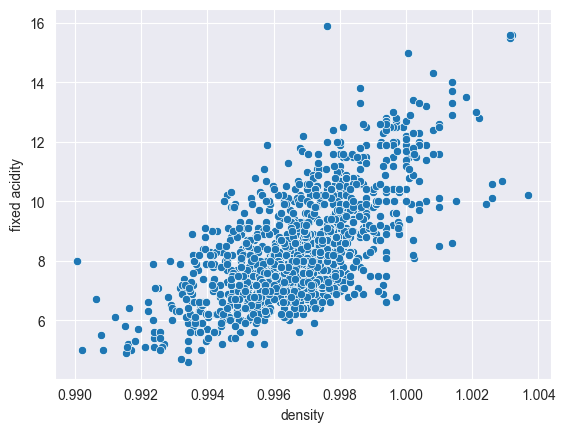

In [14]:
# Plot density against alcohol
_ = sns.scatterplot(x='density', y='fixed acidity', data=data)

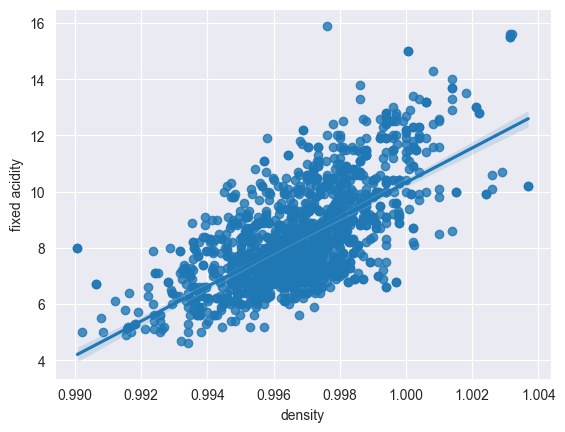

In [15]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
_ = sns.regplot(x='density', y='fixed acidity', data=data)

# 2. Objectives


The main objective of this analysis is to develop a predictive model to estimate the quality of red wine based on its physicochemical properties. 

We aim to build a model that accurately predicts the quality score of wine samples, which will assist in quality control and production optimization in the wine industry.

# 3. Linear Regression Models


1) Let's start with building a classical **linear regression** model

We need to split our dataset into features (X) and the target variable (y), then further split the data into training and testing sets. Once we have our training and testing data prepared, we can proceed with fitting the linear regression model and evaluating its performance.

In [16]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's see the performance of a classical linear regression on our wine dataset.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 0.3900251439639543
R-squared Score: 0.40318034127962277


2) Let's continue with adding polynomial effects.

Adding polynomial effects involves transforming the features by raising them to different powers. This allows the model to capture nonlinear relationships between the features and the target variable.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of polynomial features
degree = 2  # You can adjust this degree based on experimentation

# Initialize PolynomialFeatures object
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
X_poly = poly_features.fit_transform(X)

# Split the transformed features and target variable into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model with polynomial features
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)

# Evaluate the model
y_pred_poly_lr = poly_lr.predict(X_poly_test)
mse_poly_lr = mean_squared_error(y_test, y_pred_poly_lr)
r2_poly_lr = r2_score(y_test, y_pred_poly_lr)

# Print the performance metrics
print("Summary of Polynomial Regression Model (Degree={}):".format(degree))
print("Mean Squared Error (MSE):", mse_poly_lr)
print("R-squared Score:", r2_poly_lr)


Summary of Polynomial Regression Model (Degree=2):
Mean Squared Error (MSE): 0.5096119958564003
R-squared Score: 0.22018756443318954


*    ***Important!***
We initially applied a simple linear regression model to predict red wine quality, achieving moderate performance with an MSE of 0.390 and an R-squared score of 0.403. However, augmenting the model with polynomial features of degree 2 resulted in poorer performance, with an increased MSE of 0.510 and a decreased R-squared score of 0.220. This suggests that the relationships between the features and target variable may not be effectively captured by polynomial terms of this degree. Furthermore, **increasing the polynomial degree** could lead to **overfitting**, where the model fits noise in the data rather than the underlying pattern, thereby reducing its ability to generalize to unseen data. Hence, we opted not to further increase the polynomial degree in our analysis.

Let's see **Ridge Regression**

In [36]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Summary of Ridge Regression model
print("Summary of Ridge Regression Model:")
print("===================================")
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared Score:", r2_ridge)


Summary of Ridge Regression Model:
Mean Squared Error (MSE): 0.39294886788127986
R-squared Score: 0.3987064350775855


Now, let's try to find the **best alpha value for Ridge Regression** and see if it makes the prediction better

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a range of alpha values to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model
ridge = Ridge()

# Define the grid of hyperparameters to search
param_grid = {'alpha': alphas}

# Perform grid search cross-validation to find the best alpha
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge regression model with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Summary of the Ridge regression model with tuned hyperparameters
print("Summary of Ridge Regression Model with Tuned Hyperparameters:")
print("Best Alpha:", best_alpha)
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared Score:", r2_ridge)


Summary of Ridge Regression Model with Tuned Hyperparameters:
Best Alpha: 1
Mean Squared Error (MSE): 0.39294886788127986
R-squared Score: 0.3987064350775855


Result: Did not make any difference.

Let's see **Elastic Net performance**

In [45]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize ElasticNetCV model
elastic_net = ElasticNetCV(cv=5)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict on the test set 
y_pred_elastic_net = elastic_net.predict(X_test)

# Calculate MSE and R-squared
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Mean Squared Error (MSE) for ElasticNet:", mse_elastic_net)
print("R-squared Score for ElasticNet:", r2_elastic_net)


Mean Squared Error (MSE) for ElasticNet: 0.41496507908851504
R-squared Score for ElasticNet: 0.3650170489896153


# 4. Insights and key findings


Despite my preprocessing efforts, including feature selection, correlation analysis, and experimentation with various regression techniques, the models yielded suboptimal performance with R-squared scores below 0.5.

The preprocessing steps involved:

**Feature Selection:** I identified and removed features with low correlation with the target variable, quality, in an attempt to improve model efficiency and interpretability.

**Correlation Analysis:** I explored the correlation between features and the target variable using a correlation matrix heatmap. This analysis guided my feature selection process, focusing on features with higher correlations with wine quality.

**Modeling Techniques:** I experimented with different regression techniques, including linear regression, polynomial regression, ridge regression, and elastic net, to capture linear relationships and address potential overfitting.

Despite these efforts, the modest predictive power of the models suggests that the current set of features and modeling techniques may not fully capture the complexities of the wine quality prediction task.

**Additionally**, the feature engineering and selection processes did not significantly improve model performance, indicating that the current set of features may not be sufficiently informative for accurately predicting wine quality. Further exploration of feature engineering techniques and domain-specific knowledge may be necessary to identify more relevant predictors.

**Overall**, the preprocessing steps and modeling techniques I employed in this analysis provide valuable insights into the challenges of predicting wine quality based solely on chemical properties. The limitations encountered underscore the need for additional data sources, advanced modeling techniques, and domain expertise to enhance predictive accuracy and gain deeper insights into wine quality factors.

# 5. Next Steps

Given the limitations of the regression models in predicting wine quality, an alternative approach involving classification techniques may yield better results. Techniques such as K-Nearest Neighbors (KNN), Decision Trees, and Random Forests are well-suited for classification tasks and may provide better predictive accuracy on this dataset.

Moving forward, I plan to explore the following steps:

**Classification Modeling:** I will experiment with classification techniques such as KNN, Decision Trees, Random Forests, and other ensemble methods to predict wine quality based on chemical properties. These techniques may better capture the inherent structure of the data and improve predictive accuracy.

**Feature Engineering:** I will further explore feature engineering techniques to identify and create new features that may better represent underlying patterns in the data. Domain-specific knowledge and additional data sources may provide valuable insights into feature creation and selection.

**Hyperparameter Tuning:** I will perform hyperparameter tuning for classification models to optimize model performance and generalization ability. Techniques such as grid search and random search will be employed to find the best combination of hyperparameters for each model.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
